# Import bibliotek

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Wczytanie danych

In [7]:
# wczytanie danych

dataset = pd.read_csv('Social_Network_Ads.csv')

In [8]:
#print(dataset)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Przygotowanie danych

In [14]:
GenderMap = {
    'Male' : 1,
    'Female' : 0
}
# Tworzenie metody

dataset['GenderMap'] = dataset['Gender'].map(GenderMap)

# Drop

dataset_new = dataset.drop(['User ID','Gender'], axis = 1)

# Ustawienie kolejności
dataset = dataset_new[['Age','EstimatedSalary','GenderMap','Purchased']]

dataset.head()

,Age,EstimatedSalary,GenderMap,Purchased
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0


In [15]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 3].values

# Podział na dane uczące i testowe

In [ ]:
# DODAĆ zmiane parametru test_size automatycznie

In [20]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = 10)

# Trenowanie modelu

In [21]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC(n_estimators = 300, criterion = 'gini', random_state = 10)

#trenowanie
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

# Ocena modelu

In [22]:
test_score = classifier.score(X_test, y_test)
#wynik
print(test_score)

0.92


# Porównanie wyników testowych

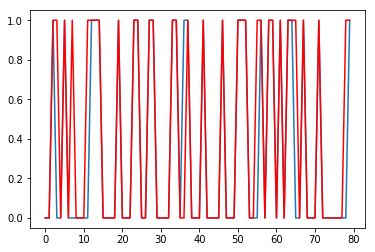

In [19]:
y_pred = classifier.predict(X_test)
#import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred, color = 'red')